In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e2/sample_submission.csv
/kaggle/input/playground-series-s3e2/train.csv
/kaggle/input/playground-series-s3e2/test.csv
/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import seaborn as sns #Python programlama dili ile veri görselleştirme işlemleri yapmak için yaygın olarak kullanılan seaborn kütüphanesini içe aktarıyor.
import matplotlib.pyplot as plt #Matplotlib, çizgi grafikleri, histogramlar, saçılım grafikleri, ısı haritaları ve daha birçok veri görselleştirme çeşidi oluşturmak için kullanılan bir Python kütüphanesidir.
import pandas as pd #Pandas, veri manipülasyonu ve analizi için kullanılan açık kaynaklı bir Python kütüphanesidir. 

from sklearn.preprocessing import StandardScaler #bir modeldeki bir özellik, diğer özelliklere kıyasla daha büyük bir değere sahip olduğunda, modelin diğer özellikler üzerinde daha az etkili olabileceği düşünülebilir.
from imblearn.over_sampling import SMOTENC #Bu kod, makine öğrenmesi modellerinde sınıf dengesizliği sorunu ile başa çıkmak için kullanılır.
from sklearn.model_selection import train_test_split #makine öğrenmesi modellerinin eğitilmesi ve değerlendirilmesi için kullanılan veri kümesini eğitim ve test setleri olarak ayırmak için kullanılır.

from sklearn.linear_model import LogisticRegression #Lojistik Regresyon, bir sınıflandırma problemi için kullanılan doğrusal bir modeldir ve özellikle iki sınıflı (binary) sınıflandırma problemlerinde sıkça tercih edilir.
from sklearn.tree import DecisionTreeClassifier #veri kümesindeki özellikleri ve bu özelliklerin sınıflandırma performansını en üst düzeye çıkarmak için sınıflandırma kurallarını belirleyen bir ağaç yapısıdır.
from sklearn.ensemble import RandomForestClassifier #birden çok karar ağacının bir araya getirilmesiyle oluşan bir topluluk öğrenme algoritmasıdır.
from xgboost import XGBClassifier #eXtreme Gradient Boosting" kelimelerinin kısaltmasıdır. Bu algoritma, özellikle yapılandırılmış verilerle çalışırken sınıflandırma veya regresyon problemlerinde çok etkilidir. 

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score  # Bu fonksiyon, sınıflandırma modelinin tahminlerinin gerçek sınıflarla nasıl karşılaştırıldığını gösteren bir matris döndürür,Bu fonksiyon, sınıflandırma modelinin performansını daha ayrıntılı bir şekilde değerlendirmek için kullanılır, Bu fonksiyon, sınıflandırma modelinin doğruluğunu değerlendirmek için kullanılan bir başka metriktir. Özellikle dengesiz sınıf dağılımlarında etkilidir.
print('start')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


start


In [3]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head(7) # ilk 7 satırı görmek için.


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [4]:
df1 = pd.read_csv('/kaggle/input/playground-series-s3e2/sample_submission.csv')
df1.head(7)

,id,stroke
0,15304,0.041296
1,15305,0.041296
2,15306,0.041296
3,15307,0.041296
4,15308,0.041296
5,15309,0.041296
6,15310,0.041296


In [5]:
test = pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv')
test.head(7)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
5,15309,Female,48.0,0,0,Yes,Private,Urban,59.20,32.5,never smoked
6,15310,Female,39.0,0,0,Yes,Private,Rural,96.26,24.9,Unknown


In [6]:
train = pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')
train.head(7)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
5,5,Female,34.0,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0
6,6,Female,53.0,0,0,Yes,Private,Rural,88.97,25.3,never smoked,0


In [7]:
df.shape # bu kod veri setimin boyutunu gösteriyor.satır/sütün
#df.info() #Veri setindeki değişkenlerin türlerini ve eksik verileri gösterir.
#5120 row , 12 column

(5110, 12)

In [8]:
missing_values_count = df.isnull().sum()

missing_values_count[0:10] # Veri setindeki eksik değerlerin sayısını her değişken için gösterir.
#Only bmi column contain null.


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
dtype: int64

Text(0.5, 1.0, 'Gender distribution')

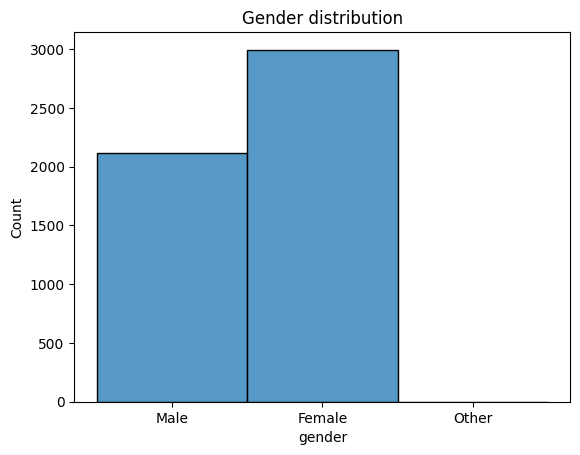

In [9]:
sns.histplot(df['gender'])
plt.title('Gender distribution')

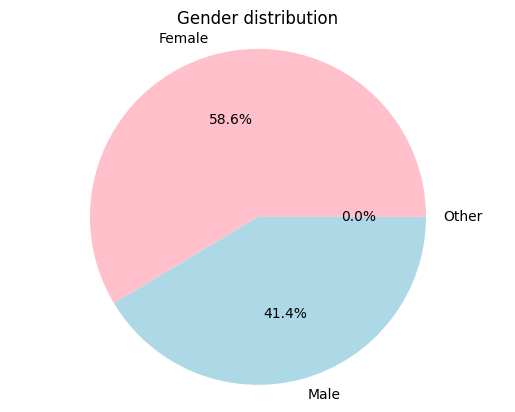

In [10]:
grouped_data = df.groupby('gender').size()
colors = ['pink', 'lightblue']
plt.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Gender distribution')
plt.show()

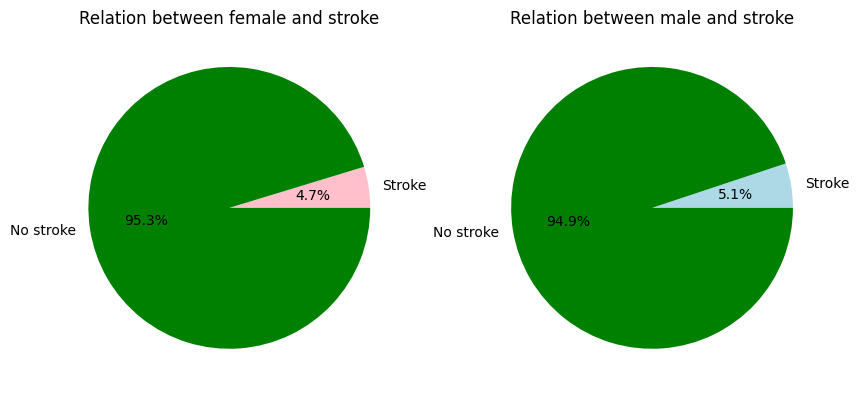

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# Kadınların inme arasındaki ilişki pie chart'ı
df_female = df[df['gender'] == 'Female']
female_stroke_count = len(df_female[df_female['stroke']==1])
female_non_stroke_count = len(df_female[df_female['stroke']==0])

labels = ['Stroke', 'No stroke']
sizes = [female_stroke_count, female_non_stroke_count]
colors = ['pink', 'green']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title('Relation between female and stroke')

# Erkeklerin inme arasındaki ilişki pie chart'ı
df_male = df[df['gender'] == 'Male']
male_stroke_count = len(df_male[df_male['stroke']==1])
male_non_stroke_count = len(df_male[df_male['stroke']==0])

labels = ['Stroke', 'No stroke']
sizes = [male_stroke_count, male_non_stroke_count]
colors = ['lightblue', 'green']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Relation between male and stroke')
plt.show()

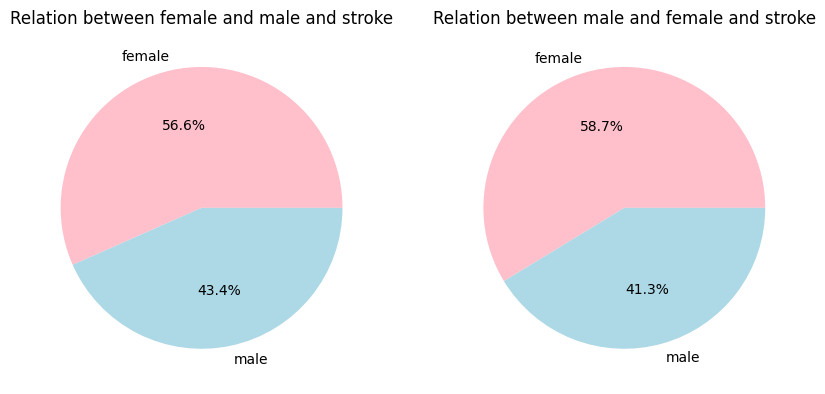

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

female_stroke_count = len(df_female[df_female['stroke']==1])
female_non_stroke_count = len(df_female[df_female['stroke']==0])
# Erkeklerin inme arasındaki ilişki pie chart'ı
male_stroke_count = len(df_male[df_male['stroke']==1])
male_non_stroke_count = len(df_male[df_male['stroke']==0])

labels = ['female', 'male']
sizes = [female_stroke_count, male_stroke_count]
colors = ['pink', 'lightblue']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title('Relation between female and male and stroke')


labels = ['female', 'male']
sizes = [female_non_stroke_count, male_non_stroke_count]
colors = ['pink', 'lightblue']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Relation between male and female and stroke')
plt.show()

Text(0.5, 1.0, 'Age distribution')

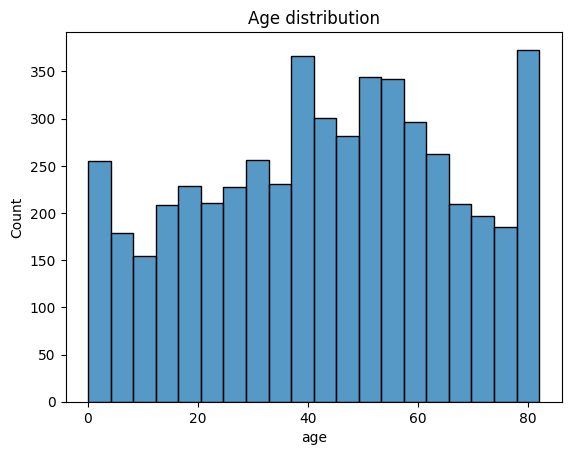

In [13]:
sns.histplot(df['age']) #Veri setindeki bir sayısal değişkenin dağılımını görselleştirir.
plt.title('Age distribution')

Text(0.5, 1.0, 'Age')

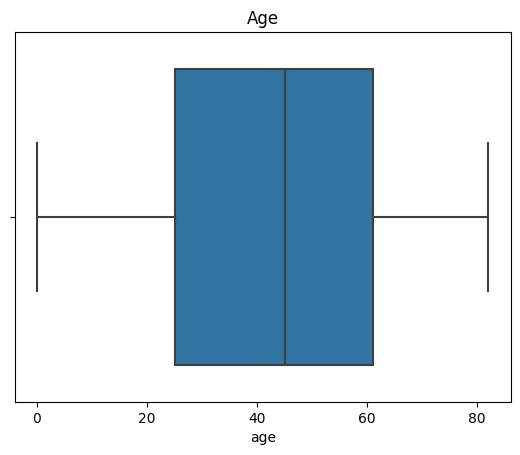

In [14]:
sns.boxplot(x='age', data=df) #Veri setindeki bir sayısal değişkenin kutu grafiğini görselleştirir ve aykırı değerleri belirlemeye yardımcı olabilir.
plt.title('Age')

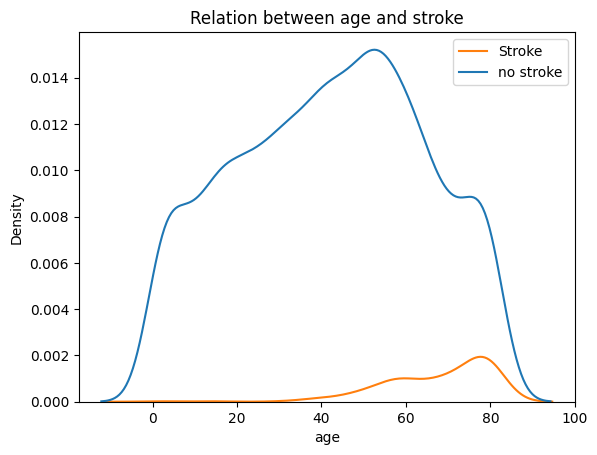

In [15]:
sns.kdeplot(data=df, x='age', hue='stroke')
plt.title('Relation between age and stroke')
plt.legend(['Stroke', 'no stroke']) 

Text(0.5, 1.0, 'Hypertension  Distribution')

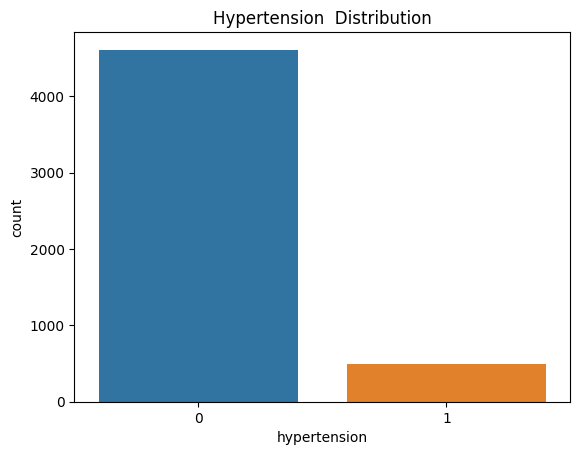

In [16]:
sns.countplot(x='hypertension', data=df)#Veri setindeki bir kategorik değişkenin sınıf sayılarını görselleştirir.
plt.title('Hypertension  Distribution')

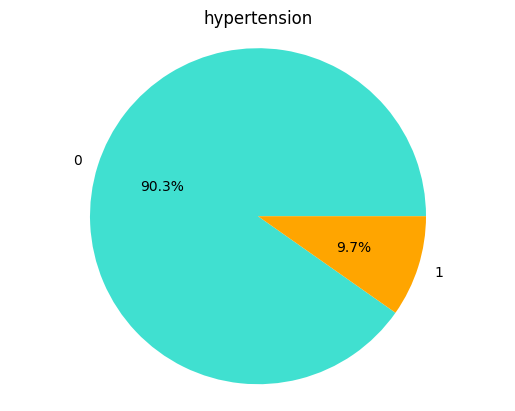

In [17]:
grouped_data = df.groupby('hypertension').size()
colors = ['turquoise', 'orange']
plt.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('hypertension')
plt.show()

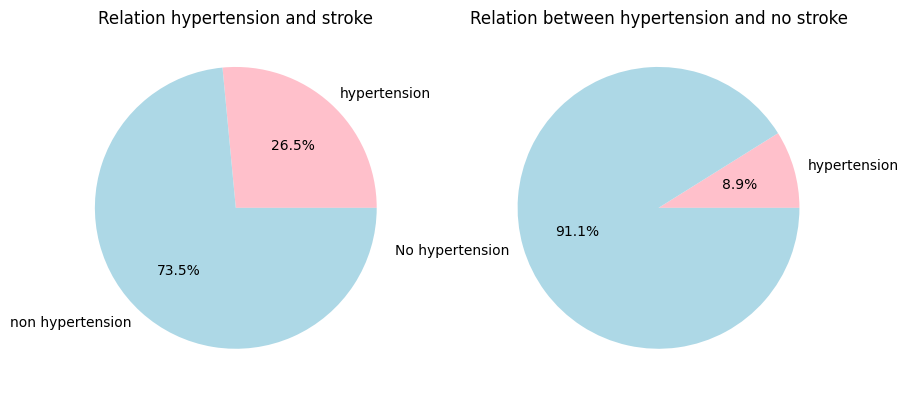

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_hypertension = df[df['hypertension'] == 1]
df_non_hypertension = df[df['hypertension'] == 0]

hypertension_stroke_count = len(df_hypertension[df_hypertension['stroke']==1])
hypertension_non_stroke_count = len(df_hypertension[df_hypertension['stroke']==0])

non_hypertension_stroke_count = len(df_non_hypertension[df_non_hypertension['stroke']==1])
non_hypertension_non_stroke_count = len(df_non_hypertension[df_non_hypertension['stroke']==0])

labels = ['hypertension', 'non hypertension']
sizes = [hypertension_stroke_count, non_hypertension_stroke_count]
colors = ['pink', 'lightblue']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title('Relation hypertension and stroke')


labels = ['hypertension', 'No hypertension']
sizes = [hypertension_non_stroke_count, non_hypertension_non_stroke_count]
colors = ['pink', 'lightblue']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Relation between hypertension and no stroke')
plt.show()

Text(0.5, 1.0, 'Heart Disease Distribution')

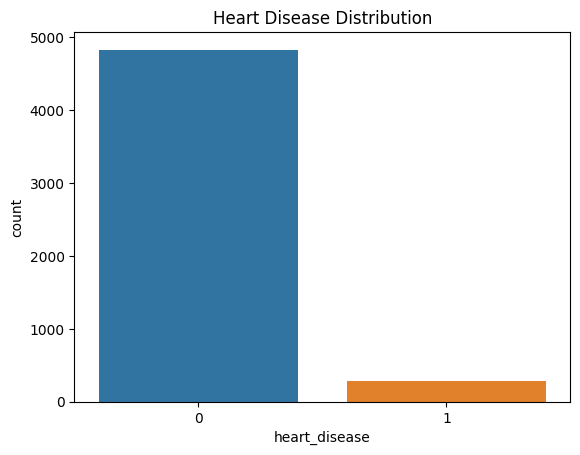

In [19]:
sns.countplot(x='heart_disease', data=df)#Veri setindeki bir kategorik değişkenin sınıf sayılarını görselleştirir.
plt.title('Heart Disease Distribution')

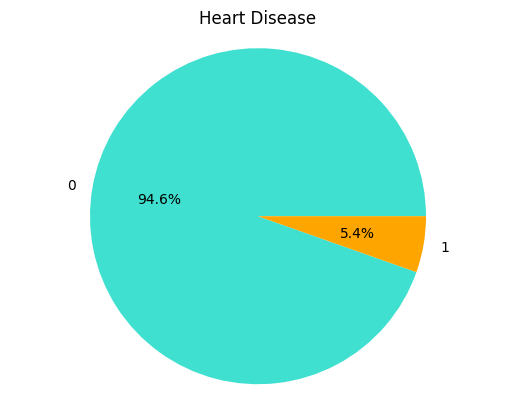

In [20]:
grouped_data = df.groupby('heart_disease').size()
colors = ['turquoise', 'orange']
plt.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Heart Disease')
plt.show()

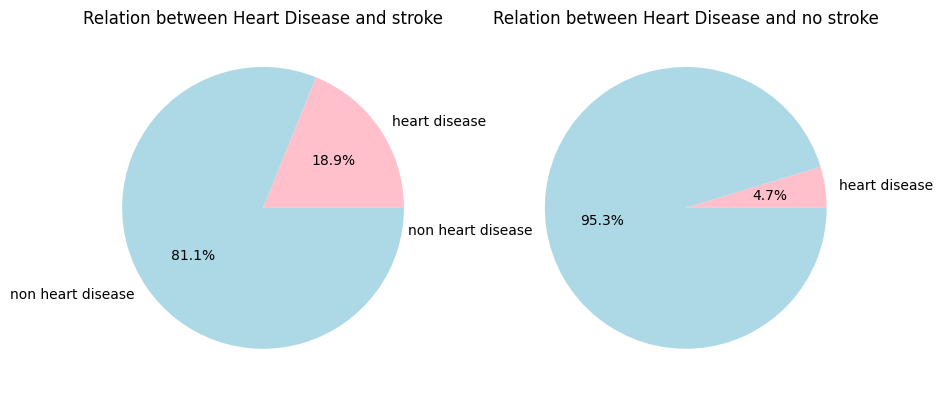

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_heart_disease = df[df['heart_disease'] == 1]
df_non_heart_disease = df[df['heart_disease'] == 0]

heart_disease_stroke_count = len(df_heart_disease[df_heart_disease['stroke']==1])
heart_disease_non_stroke_count = len(df_heart_disease[df_heart_disease['stroke']==0])

non_heart_disease_stroke_count = len(df_non_heart_disease[df_non_heart_disease['stroke']==1])
non_heart_disease_non_stroke_count = len(df_non_heart_disease[df_non_heart_disease['stroke']==0])

labels = ['heart disease', 'non heart disease']
sizes = [heart_disease_stroke_count, non_heart_disease_stroke_count]
colors = ['pink', 'lightblue']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title('Relation between Heart Disease and stroke')


labels = ['heart disease', 'non heart disease']
sizes = [heart_disease_non_stroke_count, non_heart_disease_non_stroke_count]
colors = ['pink', 'lightblue']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Relation between Heart Disease and no stroke')
plt.show()

Text(0.5, 1.0, 'Ever Married Distribution')

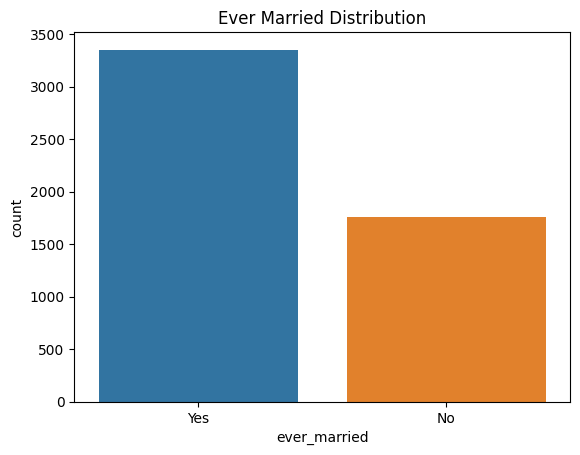

In [22]:
sns.countplot(x='ever_married',  data=df)
plt.title('Ever Married Distribution')

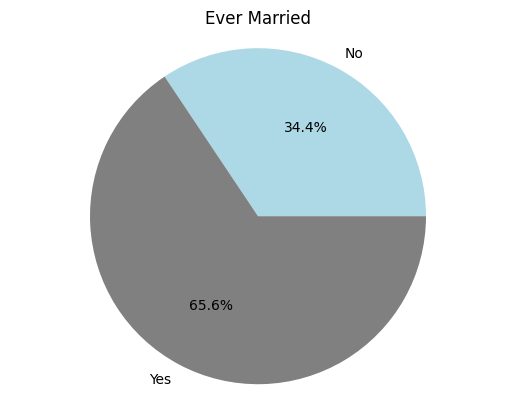

In [23]:
grouped_data = df.groupby('ever_married').size()
colors = ['lightblue', 'grey']
plt.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Ever Married')
plt.show()

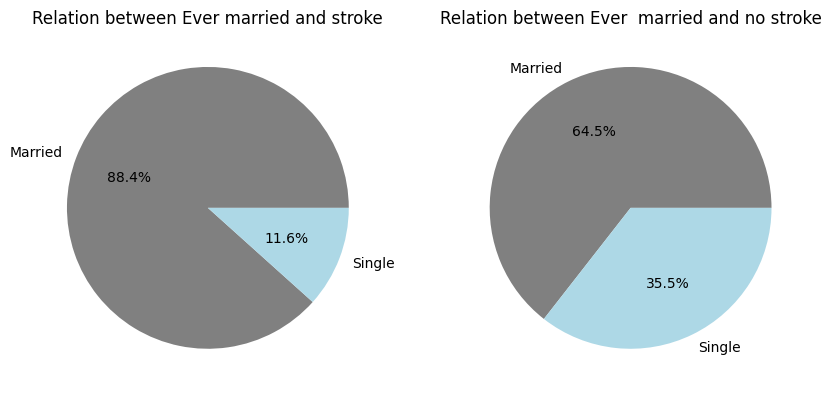

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_ever_married = df[df['ever_married'] == 'Yes']
df_non_ever_married = df[df['ever_married'] == 'No']

ever_married_stroke_count = len(df_ever_married[df_ever_married['stroke']==1])
ever_married_non_stroke_count = len(df_ever_married[df_ever_married['stroke']==0])

non_ever_married_stroke_count = len(df_non_ever_married[df_non_ever_married['stroke']==1])
non_ever_married_non_stroke_count = len(df_non_ever_married[df_non_ever_married['stroke']==0])

labels = ['Married', 'Single']
sizes = [ever_married_stroke_count, non_ever_married_stroke_count]
colors = ['grey', 'lightblue']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title('Relation between Ever married and stroke')


labels = ['Married', 'Single']
sizes = [ever_married_non_stroke_count, non_ever_married_non_stroke_count]
colors = ['grey', 'lightblue']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Relation between Ever  married and no stroke')
plt.show()

Text(0.5, 1.0, 'Work Type Distribution')

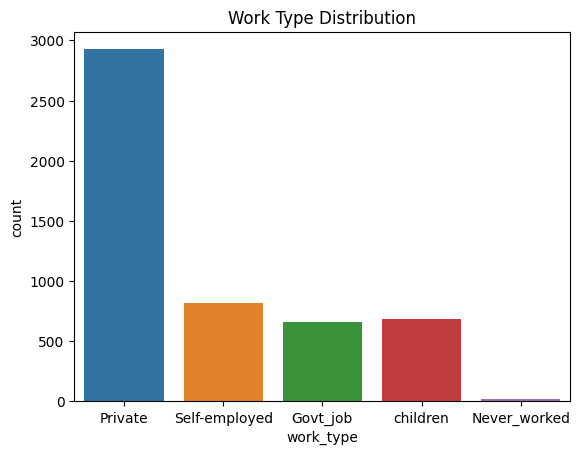

In [25]:
sns.countplot(x='work_type', data=df)
plt.title('Work Type Distribution')

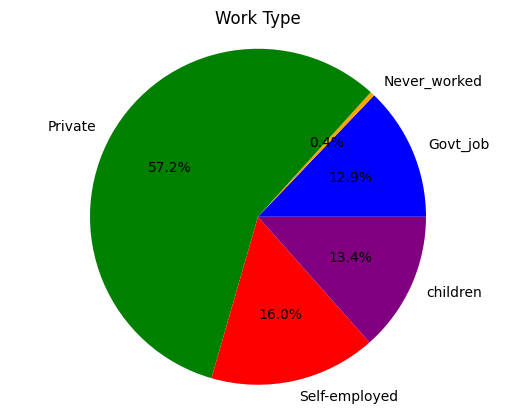

In [26]:
grouped_data = df.groupby('work_type').size()
colors = ['blue', 'orange','green','red','purple']
plt.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Work Type')
plt.show()

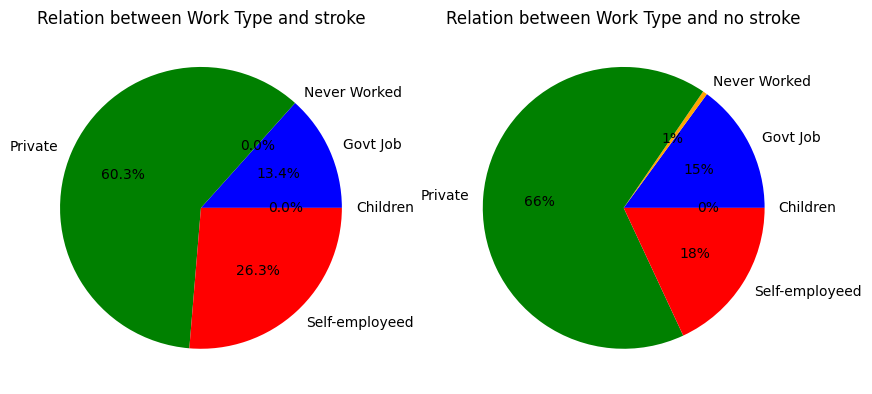

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_work_type = df[df['work_type'] == 'Govt_job']
df_work_type1 = df[df['work_type'] == 'Never_worked']
df_work_type2 = df[df['work_type'] == 'Private']
df_work_type3 = df[df['work_type'] == 'Self-employed']
df_work_type4 = df[df['work_type'] == 'Children']

work_type_stroke_count = len(df_work_type[df_work_type['stroke']==1])
work_type_non_stroke_count = len(df_work_type[df_work_type['stroke']==0])

work_type1_stroke_count = len(df_work_type1[df_work_type1['stroke']==1])
work_type1_non_stroke_count = len(df_work_type1[df_work_type1['stroke']==0])

work_type2_stroke_count = len(df_work_type2[df_work_type2['stroke']==1])
work_type2_non_stroke_count = len(df_work_type2[df_work_type2['stroke']==0])

work_type3_stroke_count = len(df_work_type3[df_work_type3['stroke']==1])
work_type3_non_stroke_count = len(df_work_type3[df_work_type3['stroke']==0])

work_type4_stroke_count = len(df_work_type4[df_work_type4['stroke']==1])
work_type4_non_stroke_count = len(df_work_type4[df_work_type4['stroke']==0])


labels = ['Govt Job', 'Never Worked','Private','Self-employeed','Children']
sizes = [work_type_stroke_count, work_type1_stroke_count, work_type2_stroke_count, work_type3_stroke_count, work_type4_stroke_count]
colors = ['blue', 'orange','green','red','purple']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title('Relation between Work Type and stroke')


labels = ['Govt Job', 'Never Worked','Private','Self-employeed','Children']
sizes = [work_type_non_stroke_count, work_type1_non_stroke_count, work_type2_non_stroke_count, work_type3_non_stroke_count, work_type4_non_stroke_count]
colors = ['blue', 'orange','green','red','purple']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.f%%')
ax2.set_title('Relation between Work Type and no stroke')
plt.show()

Text(0.5, 1.0, 'Residence Type Distribution')

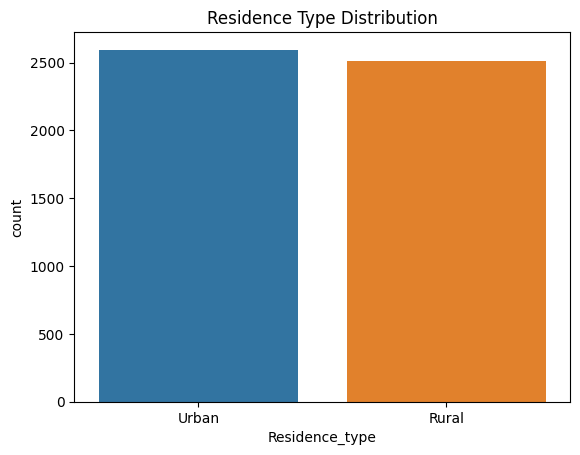

In [28]:
sns.countplot(x='Residence_type', data=df)
plt.title('Residence Type Distribution')

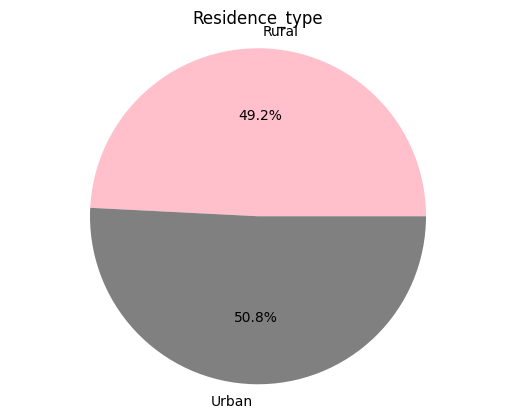

In [29]:
grouped_data = df.groupby('Residence_type').size()
colors = ['pink', 'grey']
plt.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Residence_type')
plt.show()

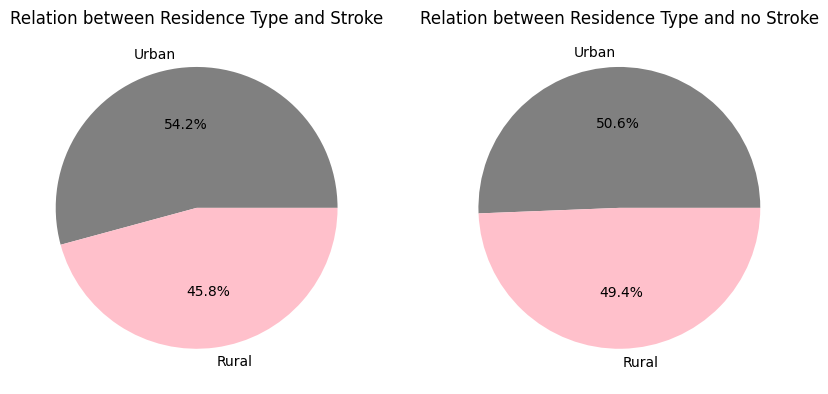

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_Residence_type = df[df['Residence_type'] == 'Urban']
df_Residence_type1 = df[df['Residence_type'] == 'Rural']

Residence_type_stroke_count = len(df_Residence_type[df_Residence_type['stroke']==1])
Residence_type_non_stroke_count = len(df_Residence_type[df_Residence_type['stroke']==0])

Residence_type1_stroke_count = len(df_Residence_type1[df_Residence_type1['stroke']==1])
Residence_type1_non_stroke_count = len(df_Residence_type1[df_Residence_type1['stroke']==0])

labels = ['Urban', 'Rural']
sizes = [Residence_type_stroke_count, Residence_type1_stroke_count]
colors = ['grey', 'pink']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title('Relation between Residence Type and Stroke')


labels = ['Urban', 'Rural']
sizes = [Residence_type_non_stroke_count, Residence_type1_non_stroke_count]
colors = ['grey', 'pink']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Relation between Residence Type and no Stroke')
plt.show()

Text(0.5, 1.0, 'Average Glucose Level ')

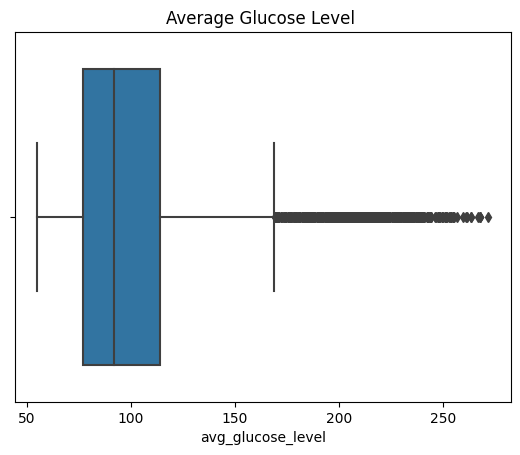

In [31]:
sns.boxplot(x='avg_glucose_level', data=df) #Veri setindeki bir sayısal değişkenin kutu grafiğini görselleştirir ve aykırı değerleri belirlemeye yardımcı olabilir.
plt.title('Average Glucose Level ')

Text(0.5, 1.0, 'Average Glucose Level')

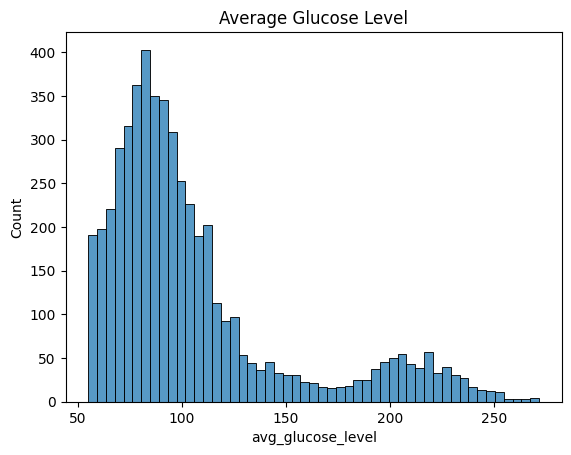

In [32]:
sns.histplot(x='avg_glucose_level', data=df)
plt.title('Average Glucose Level')

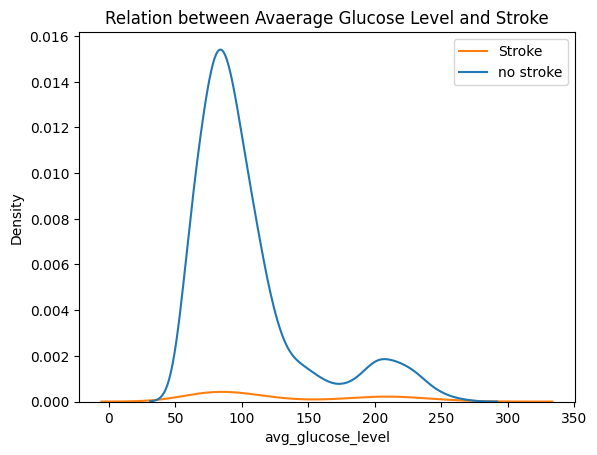

In [33]:
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke')
plt.title('Relation between Avaerage Glucose Level and Stroke')
plt.legend(['Stroke', 'no stroke']) 

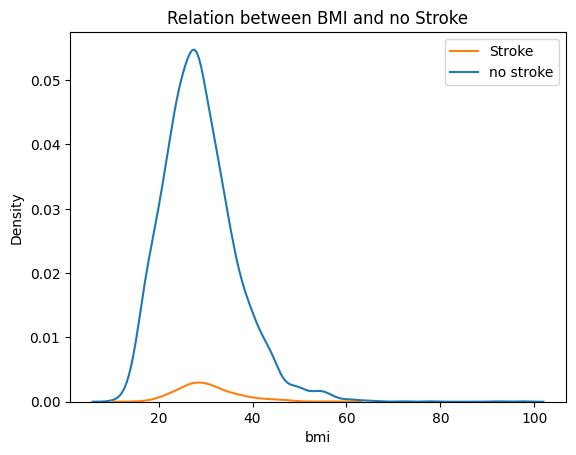

In [34]:
sns.kdeplot(data=df, x='bmi', hue='stroke')
plt.title('Relation between BMI and no Stroke')
plt.legend(['Stroke', 'no stroke'])

Text(0.5, 1.0, 'Smoking status Distribution')

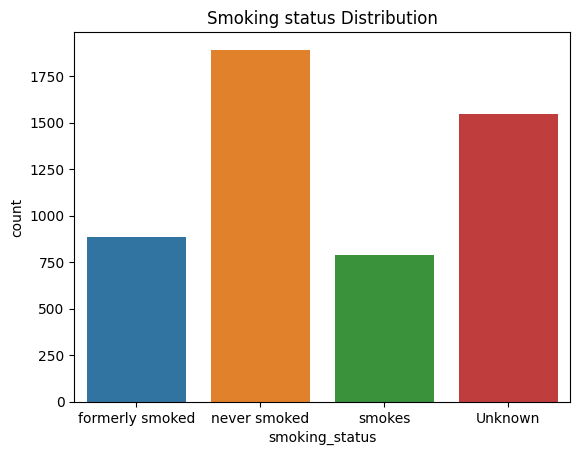

In [35]:
sns.countplot(x='smoking_status', data=df)
plt.title('Smoking status Distribution')


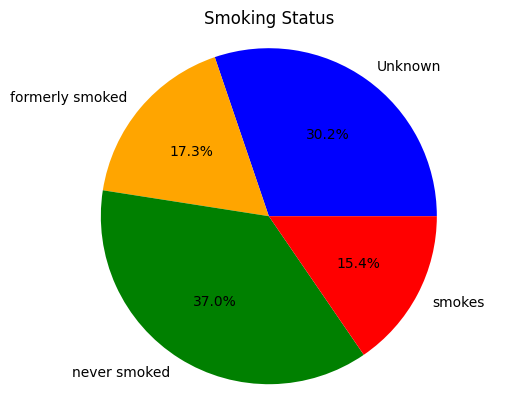

In [36]:
grouped_data = df.groupby('smoking_status').size()
colors = ['blue', 'orange','green', 'red']
plt.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Smoking Status')
plt.show()

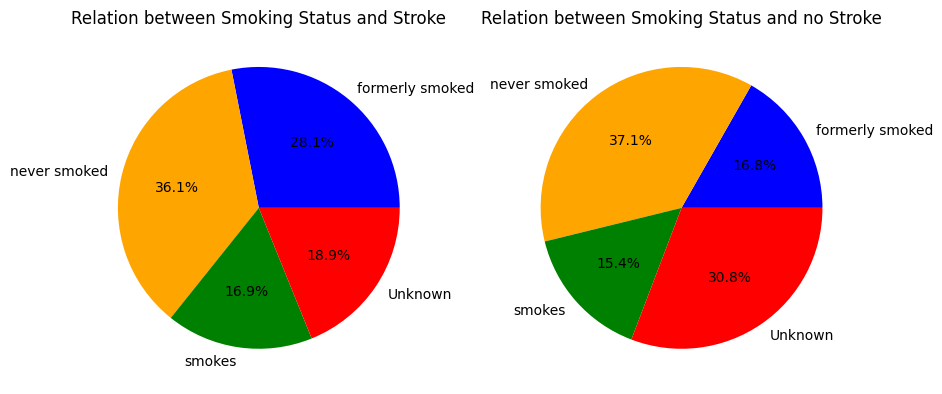

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_smoking_status = df[df['smoking_status'] == 'formerly smoked']
df_smoking_status1 = df[df['smoking_status'] == 'never smoked']
df_smoking_status2 = df[df['smoking_status'] == 'smokes']
df_smoking_status3 = df[df['smoking_status'] == 'Unknown']


smoking_status_stroke_count = len(df_smoking_status[df_smoking_status['stroke']==1])
smoking_status_non_stroke_count = len(df_smoking_status[df_smoking_status['stroke']==0])

smoking_status1_stroke_count = len(df_smoking_status1[df_smoking_status1['stroke']==1])
smoking_status1_non_stroke_count = len(df_smoking_status1[df_smoking_status1['stroke']==0])

smoking_status2_stroke_count = len(df_smoking_status2[df_smoking_status2['stroke']==1])
smoking_status2_non_stroke_count = len(df_smoking_status2[df_smoking_status2['stroke']==0])

smoking_status3_stroke_count = len(df_smoking_status3[df_smoking_status3['stroke']==1])
smoking_status3_non_stroke_count = len(df_smoking_status3[df_smoking_status3['stroke']==0])

labels = ['formerly smoked', 'never smoked', 'smokes','Unknown' ]
sizes = [smoking_status_stroke_count, smoking_status1_stroke_count, smoking_status2_stroke_count, smoking_status3_stroke_count]
colors = ['blue', 'orange','green', 'red']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title('Relation between Smoking Status and Stroke')


labels = ['formerly smoked', 'never smoked', 'smokes','Unknown' ]
sizes = [smoking_status_non_stroke_count, smoking_status1_non_stroke_count, smoking_status2_non_stroke_count, smoking_status3_non_stroke_count]
colors = ['blue', 'orange','green', 'red']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Relation between Smoking Status and no Stroke')
plt.show()

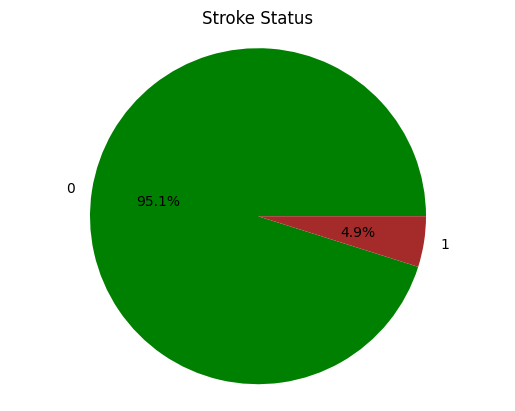

In [38]:
grouped_data = df.groupby('stroke').size()
colors = ['green','brown']
plt.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Stroke Status')
plt.show()

In [39]:
percentage_null = df['bmi'].isna().sum() / len(df) * 100
print(f"BMI nan percentage: {percentage_null}%") 

BMI nan percentage: 3.9334637964774952%


In [40]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing) 

0.32778864970645794


In [41]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df
# nann değerlerine median değri atadım.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Text(0.5, 1.0, 'BMI distribution after filling nulls')

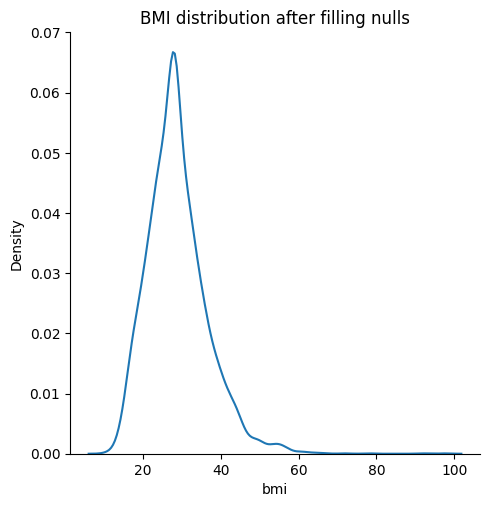

In [42]:
sns.displot(df['bmi'], kind='kde')
plt.title('BMI distribution after filling nulls')

In [43]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
col = ['ever_married','Residence_type','smoking_status','gender','work_type']
for i in col:
    train[i]=le.fit_transform(train[i])
    test[i]=le.transform(test[i])
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,28.0,0,0,1,2,1,79.53,31.1,2,0
1,1,1,33.0,0,0,1,2,0,78.44,23.9,1,0
2,2,0,42.0,0,0,1,2,0,103.00,40.3,0,0
3,3,1,56.0,0,0,1,2,1,64.87,28.8,2,0
4,4,0,24.0,0,0,0,2,0,73.36,28.8,2,0


In [45]:
X = train.drop(['stroke'], axis = 1)
y = train['stroke']

In [46]:
categorical_features = [
    'hypertension',
    'heart_disease',
    'ever_married_No',
    'ever_married_Yes',
    'gender_Female',
    'gender_Male',
    'gender_Other',
    'work_type_govt_job',
    'work_type_Never_worked',
    'work_type_Private',
    'work_type_Self_employed',
    'work_type_children',
    'Residence_Rural',
    'Residence_Urban',
    'smoking_status_Unknown',
    'smoking_status_formerly smoked',
    'smoking_status_never smoked',
    'smoking_status_smokes'
]
smote = SMOTENC(categorical_features=[feature in categorical_features for feature in X.columns])
X_resampled, y_resampled = smote.fit_resample(X, y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)

In [48]:
model_names = []
model_scores = []

In [49]:
def confusion_matrix_plot(matrix, model_name):
  """
  Plots the confusion matrix of a model as a heatmap.
  """
  _, ax = plt.subplots(figsize=(5, 3))
  plt.title(f'{model_name} Confusion Matrix')
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens')
  ax.set_xticklabels(['Postitive', 'Negative'])
  ax.set_yticklabels(['Postitive', 'Negative'])
  ax.set_ylabel('Predicted Values')
  ax.set_xlabel('Actual Values')
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')

In [50]:
lr = LogisticRegression(max_iter=1000, random_state=10)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=10)

In [51]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      4395
           1       0.80      0.86      0.83      4409

    accuracy                           0.82      8804
   macro avg       0.82      0.82      0.82      8804
weighted avg       0.82      0.82      0.82      8804



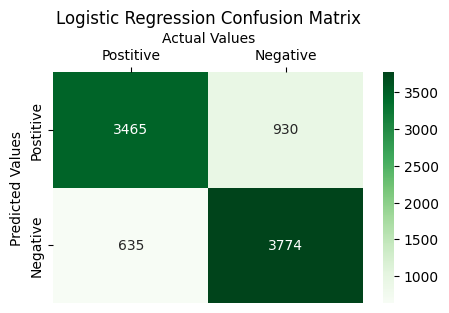

In [52]:
confusion_matrix_plot(confusion_matrix(y_test, lr.predict(X_test)), 'Logistic Regression')

In [53]:
model_names.append('Logistic Regression')
model_scores.append(roc_auc_score(y_test, lr.predict(X_test)))

In [54]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [55]:
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4395
           1       0.93      0.94      0.93      4409

    accuracy                           0.93      8804
   macro avg       0.93      0.93      0.93      8804
weighted avg       0.93      0.93      0.93      8804



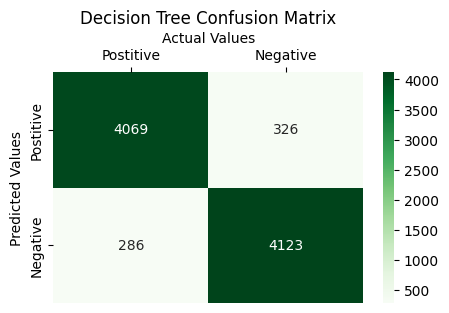

In [56]:
confusion_matrix_plot(confusion_matrix(y_test, dt.predict(X_test)), 'Decision Tree')

In [57]:
model_names.append('Decision Tree')
model_scores.append(roc_auc_score(y_test, dt.predict(X_test)))

In [58]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [59]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      4395
           1       0.91      0.96      0.94      4409

    accuracy                           0.93      8804
   macro avg       0.93      0.93      0.93      8804
weighted avg       0.93      0.93      0.93      8804



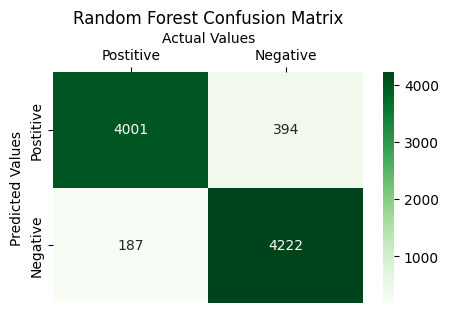

In [60]:
confusion_matrix_plot(confusion_matrix(y_test, rf.predict(X_test)), 'Random Forest')

In [61]:
model_names.append('Random Forest')
model_scores.append(roc_auc_score(y_test, rf.predict(X_test)))

In [62]:
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [63]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4395
           1       0.97      0.96      0.97      4409

    accuracy                           0.97      8804
   macro avg       0.97      0.97      0.97      8804
weighted avg       0.97      0.97      0.97      8804



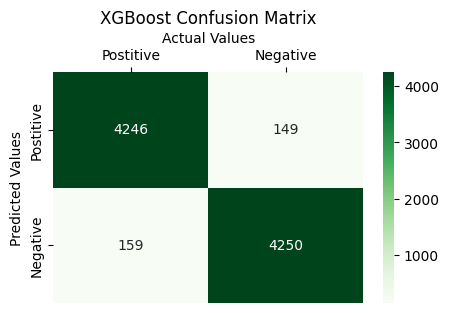

In [64]:
confusion_matrix_plot(confusion_matrix(y_test, xgb.predict(X_test)), 'XGBoost')

In [65]:
model_names.append('XGBoost')
model_scores.append(roc_auc_score(y_test, xgb.predict(X_test)))

In [66]:
model_and_score = pd.DataFrame()
model_and_score['name'] = model_names
model_and_score['score'] = model_scores
model_and_score.style.background_gradient(cmap=sns.light_palette('green', as_cmap=True))

,name,score
0,Logistic Regression,0.822186
1,Decision Tree,0.930479
2,Random Forest,0.933970
3,XGBoost,0.965018
